In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
__author__ = 'Author'
__email__ = 'Email'

# UAlberta at SemEval-2025 Task 2

In [2]:
# built-in
import os
# public
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
colors = [plt.cm.Paired(i) for i in range(20)]
# private

## Test Results

In [65]:
# init values
test_dl = [54.4, 54.2, 64.1, 52.7, 54.5, 52.8, 52.8, 0, 63.3, 33.0, 53.6]
test_gt = [52.6, 59.1, 61.7, 51.4, 56.6, 55.4, 55.2, 29.2, 64.7, 49.0, 53.5]
test_gpt = [59.4, 64.3, 70.8, 64.8, 66.5, 67.1, 64.2, 39.2, 63.6, 54.8, 61.5]
# test_gpt_net = [93.2, 89.4, 92.2, 91.9, 93.8, 93.0, 92.9, 92.0, 88.2, 87.2, 91.4]
test_wikigpt = [93.2, 89.5, 92.2, 91.9, 93.8, 93.0, 93.0, 92.0, 89.1, 87.2, 91.5]

xlabels = ['ar', 'de', 'es', 'fr', 'it', 'ja', 'ko', 'th', 'tr', 'zh', 'Avg.']

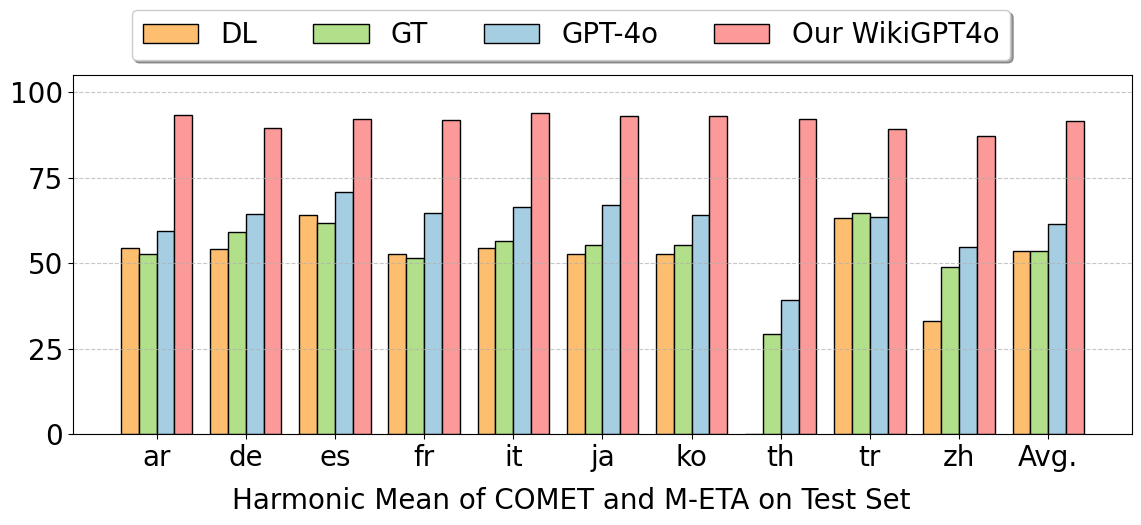

In [68]:
# settings
bar_width = 0.2
x = np.arange(len(xlabels))

# plot
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(x - 1.5 * bar_width, test_dl
       , width=bar_width
       , label='DL'
       , edgecolor='black'
       , color=colors[6]
       )
ax.bar(x - 0.5 * bar_width
       , test_gt
       , width=bar_width
       , label='GT'
       , edgecolor='black'
       , color=colors[2]
       )
ax.bar(x + 0.5 * bar_width
       , test_gpt
       , width=bar_width
       , label='GPT-4o'
       , edgecolor='black'
       , color=colors[0]
       )
ax.bar(x + 1.5 * bar_width
       , test_wikigpt
       , width=bar_width
       , label='Our WikiGPT4o'
       , edgecolor='black'
       , color=colors[4]
       )

# axis setup
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize=20)
ax.set_yticks(np.arange(0, 110, 25))
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(xlabels, fontsize=20)
ax.set_ylim(0, 105)
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, fancybox=True, shadow=True, fontsize=20)

# xlabel centered in the image
fig.text(
    0.5,                # x-position (center of figure)
    0.07,               # y-position (adjust as needed for spacing)
    'Harmonic Mean of COMET and M-ETA on Test Set',
    ha='center',
    va='center',
    fontsize=20
)
# save figure
fig.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for xlabel
fig.savefig(os.path.join('res', 'figures', 'test.png'), dpi=300, bbox_inches='tight')

## Ensembler

In [128]:
val_ensembler = [65.4, 55.6, 55.1, 69.4]
ensemblers = ['GPT-4o', 'Random', 'Literal', 'Best-First (WD)']

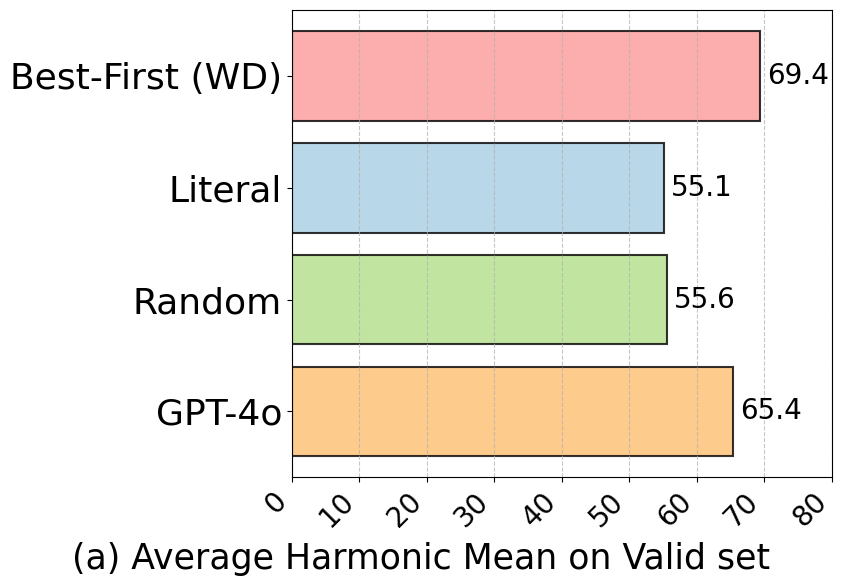

In [129]:
# bar chart 
fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(
    ensemblers, val_ensembler
    , color=[colors[6], colors[2], colors[0], colors[4]]
    , edgecolor='black'
    , linewidth=1.5
    , alpha=0.8
    , height=0.8
    )
# ax.set_xlabel('Harmonic Mean of COMET and M-ETA on Fr Valid', fontsize=20, loc='center')
# add centered xlabel relative to the entire figure
fig.text(
    0.5,                # x-position (center of figure)
    0.02,               # y-position (adjust as needed for spacing)
    '(a) Average Harmonic Mean on Valid set',
    ha='center',
    va='center',
    fontsize=25
)
ax.set_xticks(np.arange(0, 81, 10))
ax.set_xticklabels(np.arange(0, 81, 10), rotation=45, ha='right', fontsize=20)
ax.grid(axis='x', linestyle='--', alpha=0.7)
# add data labels
for i, v in enumerate(val_ensembler):
    ax.text(v + 1, i, f'{v:.1f}', color='black', va='center', fontsize=20)
# save figure
fig.tight_layout()
fig.savefig(os.path.join('res', 'figures', 'ensemble.png'), dpi=300, bbox_inches='tight')

## BN vs WD

In [130]:
nets_results = [65.4, 82.1, 90.7]
nets = ['GPT-4o', '+BN NETs', '+WD NETs']

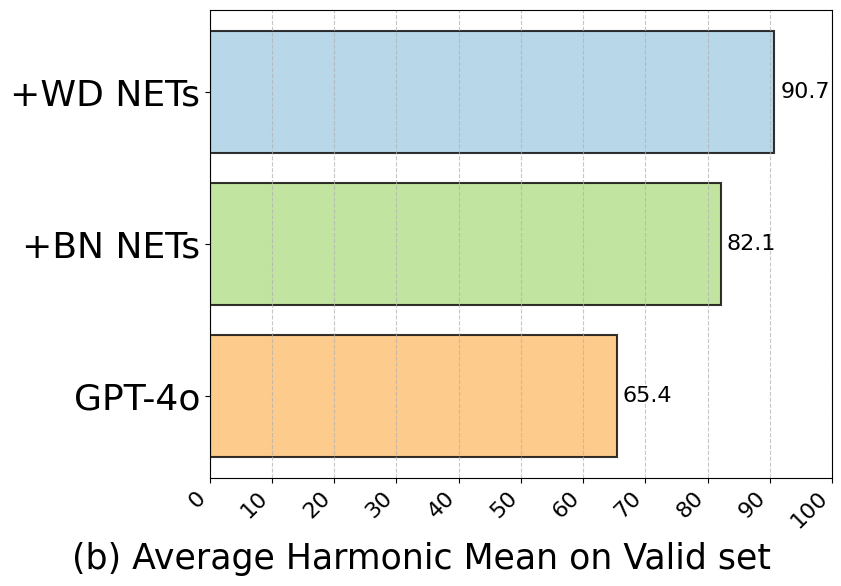

In [131]:
# bar chart 
fig, ax = plt.subplots(figsize=(9, 6))
ax.barh(
    nets, nets_results
    , color=[colors[6], colors[2], colors[0], colors[4]]
    , edgecolor='black'
    , linewidth=1.5
    , alpha=0.8
    , height=0.8
    )
# ax.set_xlabel('Harmonic Mean of COMET and M-ETA on Fr Valid', fontsize=20, loc='center')
# add centered xlabel relative to the entire figure
fig.text(
    0.5,                # x-position (center of figure)
    0.02,               # y-position (adjust as needed for spacing)
    '(b) Average Harmonic Mean on Valid set',
    ha='center',
    va='center',
    fontsize=25
)
ax.set_xticks(np.arange(0, 109, 10))
ax.set_xticklabels(np.arange(0, 109, 10), rotation=45, ha='right', fontsize=16)
ax.grid(axis='x', linestyle='--', alpha=0.7)
# add data labels
for i, v in enumerate(nets_results):
    ax.text(v + 1, i, f'{v:.1f}', color='black', va='center', fontsize=16)
# save figure
fig.tight_layout()
fig.savefig(os.path.join('res', 'figures', 'nets.png'), dpi=300, bbox_inches='tight')

## Prompt Engineering

In [123]:
# init values
prompt_methods = ['GPT-4o', '+One-shot', '+BN NETs', '+WD NETs']
prompt_results = [58.9, 69.6, 80.1, 91.3]

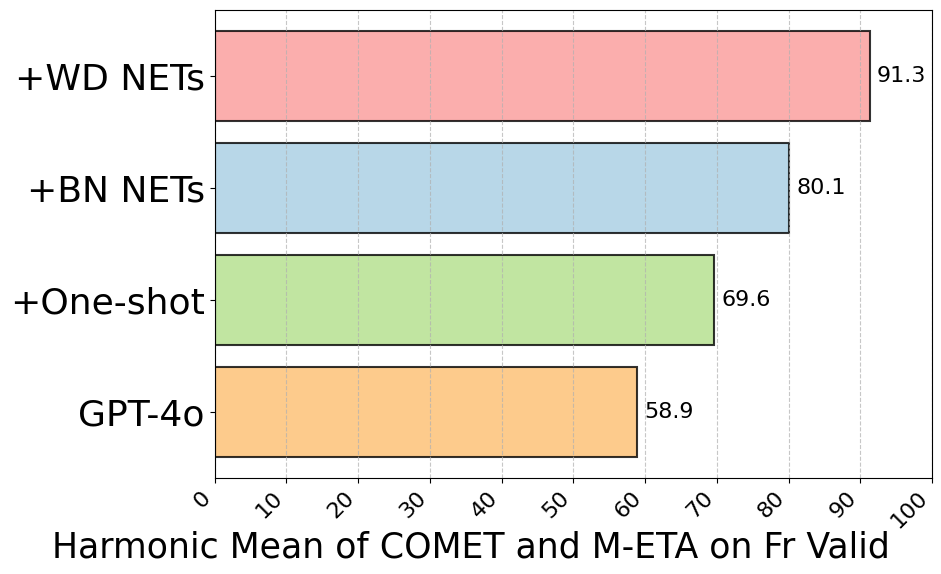

In [126]:
# bar chart 
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    prompt_methods, prompt_results
    , color=[colors[6], colors[2], colors[0], colors[4]]
    , edgecolor='black'
    , linewidth=1.5
    , alpha=0.8
    , height=0.8
    )
# ax.set_xlabel('Harmonic Mean of COMET and M-ETA on Fr Valid', fontsize=20, loc='center')
# add centered xlabel relative to the entire figure
fig.text(
    0.5,                # x-position (center of figure)
    0.04,               # y-position (adjust as needed for spacing)
    'Harmonic Mean of COMET and M-ETA on Fr Valid',
    ha='center',
    va='center',
    fontsize=25
)
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels(np.arange(0, 101, 10), rotation=45, ha='right', fontsize=16)
ax.grid(axis='x', linestyle='--', alpha=0.7)
# add data labels
for i, v in enumerate(prompt_results):
    ax.text(v + 1, i, f'{v:.1f}', color='black', va='center', fontsize=16)
# save figure
fig.tight_layout()
fig.savefig(os.path.join('res', 'figures', 'gpt.png'), dpi=300, bbox_inches='tight')